In [ ]:
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras import Model # if only machine learning were this easy :P

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
#import any other libraries you want here:
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# YOUR TURN:
# Currently the x data is represented by uint8 between 0 and 255.
# Convert it to a float32 and scale it down to between 0 and 1.
x_train = x_train.astype(np.float32)
x_train /= 255.
x_test = x_test.astype(np.float32)
x_test /= 255.

# Let's grab some validation data from our training dataset!
# 5000 datapoints should be enough.
# Remember to remove them from your training data!
x_val = x_train[:5000]
y_val = y_train[:5000]

x_train = x_train[5000:]
y_train = y_train[5000:]

# This stuff will throw an error until the above is completed.
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(45000, 32, 32, 3)
(45000, 1)
(5000, 32, 32, 3)
(5000, 1)
(10000, 32, 32, 3)
(10000, 1)


The CIFAR10 Dataset we will be playing with first is a dataset of 32x32 rgb images that fall into one of 10 catagories. Take a look at what an image may look like.

[6]


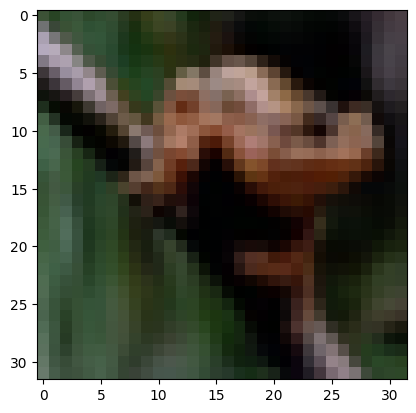

In [ ]:
plt.imshow(x_train[0])
print(y_train[0])

## **Designing the Model**

In [ ]:
input_shape = x_train[0].shape

# First, we declare the size of our inputs
inputs = tf.keras.Input(shape=input_shape)

# YOUR TURN:
# This is where our layers go. Add/modify the layers of your
# neural network here.
# Note the basic syntax for defining this network. Each layer
# is defined by calling a function on the layer before; the functions
# themselves and their parameters are outlined in the tf.keras docs

#You should customize and experiment with your architecture, but if you want
#a (somewhat arbitrary) place to start, try the following:
    # 5x5 convolutional layer with 10 output channels
    # maxpool 2
    # 3x3 convolution with 20 output channels
    # Batchnorm
    # Maxpool 2
    # Flatten
    # Dropout = 0.5
    # FC layers with 128 neurons
    # Batchnorm
    # FC layers with 10 neurons

x = layers.Conv2D(filters=10, kernel_size=(5,5))(inputs)
x = layers.MaxPool2D(pool_size=(2,2))(x)
x = layers.Conv2D(filters=20, kernel_size=(3,3))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2,2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(rate=.5)(x)
x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(10)(x)

model = tf.keras.Model(inputs=inputs, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 10)        760       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 20)        1820      
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 20)       80        
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 20)         0     

In [ ]:
#Select an appropriate keras optimizer and adjust its parameters: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
opt = tf.keras.optimizers.Adam()

#Select an appropriate keras loss function. remember to set from_logits=True if your model does not pass your outputs
#through a softmax function: https://www.tensorflow.org/api_docs/python/tf/keras/losses
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=opt,
              loss=loss_func,
              metrics=['accuracy'] #metrics tells the model what to print while we are training. We would like to see the accuracy
              )

##**Training the Model**

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1407/1407 [==============================] - 19s 6ms/step - loss: 1.6821 - accuracy: 0.4116 - val_loss: 1.4464 - val_accuracy: 0.5000
Epoch 2/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4372 - accuracy: 0.4974 - val_loss: 2.3234 - val_accuracy: 0.2626
Epoch 3/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3609 - accuracy: 0.5250 - val_loss: 1.7173 - val_accuracy: 0.4528
Epoch 4/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3163 - accuracy: 0.5411 - val_loss: 1.3313 - val_accuracy: 0.5392
Epoch 5/10
1407/1407 [==============================] - 8s 5ms/step - loss: 1.2924 - accuracy: 0.5513 - val_loss: 1.5774 - val_accuracy: 0.4600
Epoch 6/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2750 - accuracy: 0.5536 - val_loss: 1.2215 - val_accuracy: 0.5684
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2613 - accuracy: 0.5614 - val_loss: 1.1439 - val_accuracy

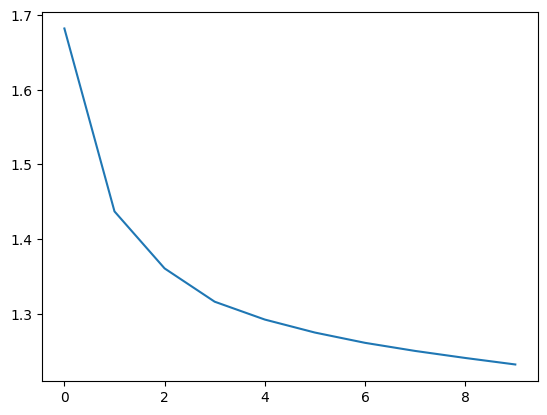

In [ ]:
# Take a look at your training history
plt.plot(history.history['loss'])

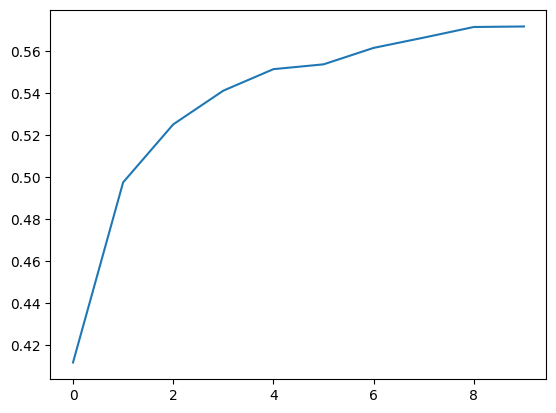

In [ ]:
plt.plot(history.history['accuracy'])

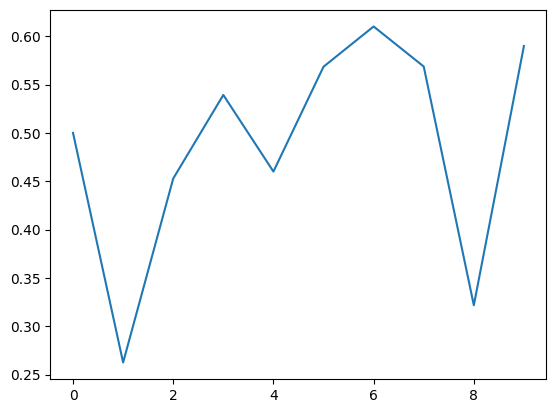

In [ ]:
plt.plot(history.history['val_accuracy'])

In [ ]:
# Now that our model is trained, this is how to pass data through it to get predictions.
# training=False is used to tell the program how to handle layers that behave differently
# during training and testing (like dropout and batchnorm)
pred = model(x_test, training=False)

# Select the metric you want for testing accuracy. It should look very similar to your loss function
# https://www.tensorflow.org/api_docs/python/tf/keras/metrics
test_acc = tf.keras.metrics.SparseCategoricalCrossentropy(name='sparse_categorical_crossentropy', from_logits=False)

# Comparing your predictions, make sure that pred.shape=(10000, 10) and y_test.shape=(10000, 1)
test_acc.reset_states()
test_acc(y_test, pred)
print(test_acc.result())

tf.Tensor(2.1978824, shape=(), dtype=float32)


#Playing Card Identification with CNNs

In [ ]:
#we are unzipping our data locally so that we will not need to go to our google drive to collect our data
from zipfile import ZipFile

path = "/content/drive/MyDrive/Lab 5/card_data.zip"
with ZipFile(path, 'r') as zObject:
    zObject.extractall(
        path="/content/card_data")

In [ ]:
#Load the csv file into a pandas dataframe or numpy array (I used pandas)
df = pd.read_csv("/content/card_data/cards.csv")

#loop through your dataframe. For each element:
  #make sure the filepath is valid. You can use either try/except blocks or os.path.exists()
    #if it does not, remove that item from the csv
  #load the image as a numpy array/tensorflow tensor you may want to use: tf.io.decode_jpeg(tf.io.read_file(PATH))
  #do necessary modifications
  #save the modified image as a npy or npz file using np.save
  #remove the jpg file using os.remove
  #update filepath in the csv
for index, row in df.iterrows():
  image_path = df.at[index, "filepaths"]
  image_path = f"/content/card_data/{image_path}"
  if not os.path.exists(image_path):
    df.drop(index=index, inplace=True)
    continue
  image = tf.io.decode_jpeg(tf.io.read_file(image_path))
  image = tf.cast(image, tf.float32)
  image /= 255.
  np.save(f"newimage{index}.npy", image)
  os.remove(image_path)
  df.at[index, "filepaths"] = f"newimage{index}.npy"

df.to_csv("/content/card_data/cards.csv", index=False)



#save the updated csv with .to_csv() or savetxt()

In [ ]:
#do some investigation to make sure the specifications above have been met
df = pd.read_csv("/content/card_data/cards.csv")
print(df)

      class index         filepaths         labels card type data set
0               0     newimage0.npy   ace of clubs       ace    train
1               0     newimage1.npy   ace of clubs       ace    train
2               0     newimage2.npy   ace of clubs       ace    train
3               0     newimage3.npy   ace of clubs       ace    train
4               0     newimage4.npy   ace of clubs       ace    train
...           ...               ...            ...       ...      ...
8149           52  newimage8150.npy  two of spades       two    valid
8150           52  newimage8151.npy  two of spades       two    valid
8151           52  newimage8152.npy  two of spades       two    valid
8152           52  newimage8153.npy  two of spades       two    valid
8153           52  newimage8154.npy  two of spades       two    valid

[8154 rows x 5 columns]


In [ ]:
#Creates a generator for our dataset
class PhotoDatasetGenerator:
    def __init__(self, set_type, root, crop=False, flip_ho=False, flip_vert=False):
        """
        inputs:
          set_type: one of 'train' 'test' 'valid' indicating what data we want from our csv
          root: the root path to card_data folder
          **augmentations:
            - crop: an int indicating the height and width we should crop our images to. If
                False then do no cropping
            - flip_ho: bool indicating if we should do horizontal flipping
            - flip_vert: bool indicating if we should do vertical flipping

        creates (at least) the following members:
          self.root: same as passed root
          self.csv: a np array or pd datafram from our cleaned cards.csv file. This should include
            only data from the appropriate set (dictated by set_type) and should also be shuffled
          self.augmentations: a dictionary that indicates what data augmentations we are currently using
        """
        #set root
        self.root = root

        #set self.csv
        cards = pd.read_csv(f"{root}cards.csv")
        self.csv = cards[cards['data set']==set_type]

        #set self.augmentations. Worry about this only when you get to the data augmentation section
        self.crop_dim = min(crop, 224) if type(crop) == int else False

        self.do_flip_ho = flip_ho
        self.do_flip_vert = flip_vert

    def __len__(self):
        #return the length of the csv
        return len(self.csv)

    def __getitem__(self,idx):
        #return the image (as an array) and the label corresponding to the
        #index idx of self.csv
        row = self.csv.iloc[idx]
        image = np.load(row["filepaths"])
        label = row["class index"]
        return image, label

    #this is the generator stuff. When our class is called, it acts as a
    #generator. yield gives the next item to be generated so every time
    #an item is asked for, it will yield the next item.
    def __call__(self):
        for i in range(self.__len__()):
            image, label = self.__getitem__(i)
            yield self.augment(image), label

            if i == self.__len__()-1:
                self.on_epoch_end()

    def on_epoch_end(self):
        #shuffle the dataset at the end of each epoch
        self.csv = self.csv.sample(frac=1)

    #worry about only after once you have gotten to the data augmentation part

    def augment(self, image):
        #check if we need to crop or flip the image. If crop is set, then we
        #must always crop the image. If one or both flips are true we should
        #randomly decide if we are going to flip the data. (I used probability of 1/3)
        if type(self.crop_dim) is int:
            image = self.crop(image, self.crop_dim)

        if self.do_flip_ho and np.random.choice([True, False], p=[1/3, 2/3]):
            image = self.flip_ho(image)

        if self.do_flip_vert and np.random.choice([True, False], p=[1/3, 2/3]):
            image = self.flip_vert(image)

        return image


    def crop(self, image, dim):
      #the dim should be <= image side length. Take a random square crop
      #of size dim x dim in the image. So if image.shape == (4,4,3) and dim=3
      #we can crop image = image[0:3,0:3], image[1:4,0:3], image[0:3,1:4], or image[1:4,1:4]
      #All other channels should remain the same
      return tf.image.random_crop(value=image, size=(dim, dim, 3))

    def flip_ho(self, image):
      #flip horizontally
      return tf.image.flip_left_right(image)

    def flip_vert(self, image):
      #flip vertically
      return tf.image.flip_up_down(image)

# def
crop_dims = 224
flip_ho = True
flip_vert = True
root = "/content/card_data/"
train_gen = PhotoDatasetGenerator("train", root, crop_dims, flip_ho, flip_vert)

ot = (tf.float32, tf.int64) #output types. our images are float32 and our labels are int64
os = (tf.TensorShape((crop_dims, crop_dims, 3)), tf.TensorShape([])) #The output shapes are (224,224,3) (or less if we are cropping). lables have no shape


train_ds = tf.data.Dataset.from_generator(train_gen,
                                    output_types = ot,
                                    output_shapes = os).batch(32) #batching the dataset


#using the example of training data, create valid_ds and test_ds
valid_gen = PhotoDatasetGenerator("valid", root, crop_dims, flip_ho, flip_vert)
valid_ds = tf.data.Dataset.from_generator(valid_gen, output_types=ot, output_shapes=os).batch(32)

test_gen = PhotoDatasetGenerator("test", root, crop_dims, flip_ho, flip_vert)
test_ds = tf.data.Dataset.from_generator(test_gen, output_types=ot, output_shapes=os).batch(32)

Lets explore what we just did a little more...



amount of data in generator: 7624
(224, 224, 3)
()
(224, 224, 3)
()
(224, 224, 3)
()
(224, 224, 3)
()
(224, 224, 3)
()
0


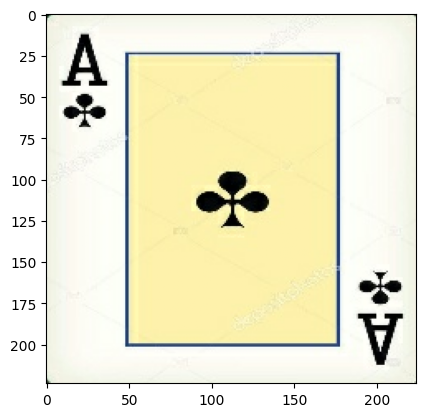

In [ ]:
print(f"amount of data in generator: {len(train_gen)}") #should be 7624
i = 0
for image, label in train_gen: #we can iterate though a generator
  i += 1
  if i == 6:
    plt.imshow(image)
    print(label)
    break
  print(image.shape) #(224, 224, 3)
  print(label.shape) #()

In [ ]:
i = 0
for images, label in train_ds: #we can also iterate though a dataset. if gives us our data in batches
  i += 1
  if i == 6:
    break
  print(images.shape) #(batch_size, crop_dims, crop_dims, 3)
  print(label.shape) #(batch_size,)

(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)


In [ ]:
#define your layers
inputs = tf.keras.Input(shape=os[0])

#Create your model
x = layers.Conv2D(filters=10, kernel_size=(5,5))(inputs)
x = layers.MaxPool2D(pool_size=(2,2))(x)
x = layers.Conv2D(filters=20, kernel_size=(3,3))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2,2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(rate=0.5)(x)
x = layers.Dense(128)(x)
outputs = layers.BatchNormalization()(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

#Compile your model with a loss and optimization

opt = tf.keras.optimizers.Adam()
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss_func, metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 10)      760       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 108, 108, 20)      1820      
                                                                 
 batch_normalization_4 (Batc  (None, 108, 108, 20)     80        
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 20)       0   

Epoch 1/10
239/239 [==============================] - 59s 236ms/step - loss: 4.9063 - accuracy: 0.0157 - val_loss: 4.6525 - val_accuracy: 0.0415
Epoch 2/10
239/239 [==============================] - 42s 177ms/step - loss: 3.4564 - accuracy: 0.2819 - val_loss: 3.1879 - val_accuracy: 0.3585
Epoch 3/10
239/239 [==============================] - 39s 164ms/step - loss: 2.7129 - accuracy: 0.4327 - val_loss: 2.1666 - val_accuracy: 0.5094
Epoch 4/10
239/239 [==============================] - 39s 163ms/step - loss: 2.3352 - accuracy: 0.5024 - val_loss: 1.8836 - val_accuracy: 0.5585
Epoch 5/10
239/239 [==============================] - 39s 162ms/step - loss: 2.0418 - accuracy: 0.5706 - val_loss: 1.7423 - val_accuracy: 0.6075
Epoch 6/10
239/239 [==============================] - 39s 161ms/step - loss: 1.7988 - accuracy: 0.6287 - val_loss: 1.6504 - val_accuracy: 0.6528
Epoch 7/10
239/239 [==============================] - 39s 164ms/step - loss: 1.5593 - accuracy: 0.6825 - val_loss: 1.7549 - val_ac

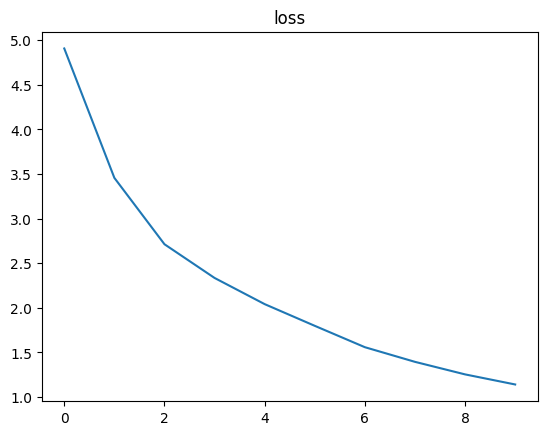

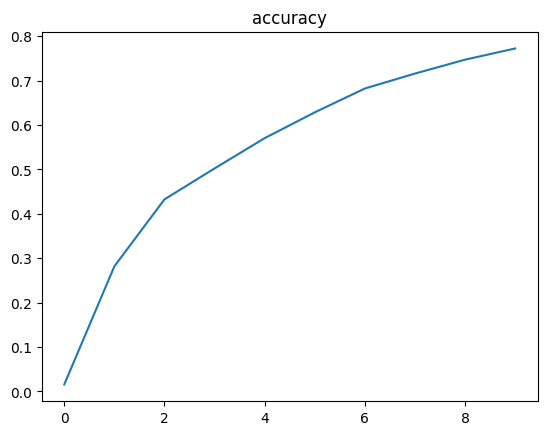

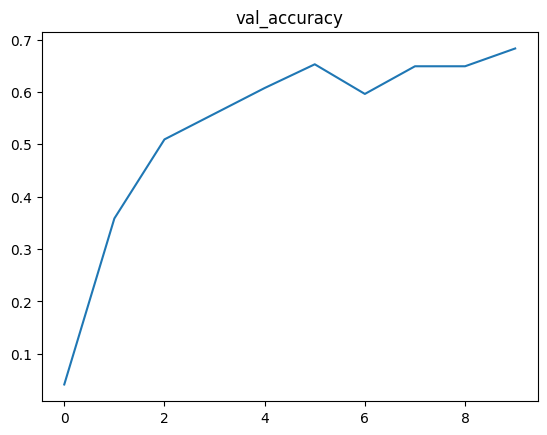

In [ ]:
#Train your model
history = model.fit(train_ds, epochs=10, validation_data=valid_ds)
plt.plot(history.history['loss'])
plt.title("loss")
plt.show()
plt.plot(history.history['accuracy'])
plt.title("accuracy")
plt.show()
plt.plot(history.history['val_accuracy'])
plt.title("val_accuracy")
plt.show()

In [ ]:
#Find your test accuracy
# acc = tf.keras.metrics.SparseCategoricalCrossentropy()

# accuracy = tf.keras.metrics.SparseCategoricalCrossentropy()

# # Evaluate the accuracy of your model predictions on the test dataset
# for x_batch, y_batch in test_ds:
#     y_pred_batch = model(x_batch, training=False)
#     accuracy.update_state(y_batch, y_pred_batch)

# acc_value = accuracy.result().numpy()

# print("Accuracy:", acc_value)
metric = tf.keras.metrics.SparseCategoricalAccuracy()

# Evaluate the accuracy of your model predictions on the test dataset
metric.reset_state()
for x_batch, y_batch in test_ds:
    y_pred_batch = model(x_batch, training=False)
    metric.update_state(y_batch, y_pred_batch)

acc_value = metric.result().numpy()

print("Accuracy: ", acc_value)

Accuracy:  0.6716981


##Adding Data Augmentation
Going back to your dataset, fill in the data augmentation sections and rerun you model. Was there a difference?

**A note on randomness**:
using pseudo random number generators for your "random numbers" will greatly slow down your code. Remember, you are running this code thousands of times per epoch so I recommend finding another way of determining how to crop and whether to flip. One idea is to create another member variable which changes as your generator is called, and use this to make your "random" decisions.